# DATA CLEANING - PYTHON AND PANDAS

## Información de las variables
- **first_name**: Primer nombre del empleado.
- **last_name**: Apellido del empleado.
- **email**: Dirección de correo electrónico del empleado.
- **gender**: Género del empleado (Masculino/Femenino).
- **work_year**: Año en el que se registró el salario.
- **job_category**: Categoría del trabajo (por ejemplo, IT, Marketing, Finanzas).
- **job_title**: Título específico del trabajo (por ejemplo, Desarrollador de Software, Analista de Negocios).
- **salary_currency**: Moneda en la que se expresa el salario.
- **salary**: Salario anual del empleado.
- **employee_residence**: País de residencia del empleado.
- **experience_level**: Nivel de experiencia del empleado (por ejemplo, Principiante, Intermedio, Ejecutivo).
- **employment_type**: Tipo de empleo (por ejemplo, Tiempo completo, Medio tiempo, Contrato).
- **work_setting**: Configuración del lugar de trabajo (por ejemplo, Remoto, Oficina, Presencial).
- **company_size**: Tamaño de la empresa según la cantidad de empleados (por ejemplo, Pequeña (1-50 empleados), Mediana (51-500 empleados), Grande (501+ empleados)).


In [1]:
# Importación de librerias
!{sys.executable} -m pip install pandas seaborn
import pandas as pd
import seaborn as sns

In [2]:
# Analicemos el set de datos
data = pd.read_csv('./data/jobs_salary_example.csv')
data.head()

,first_name,last_name,email,gender,work_year,job_category,job_title,salary_currency,salary,employee_residence,experience_level,employment_type,work_setting,company_size
0,Cornie,Seymour,cseymour0@house.gov,Male,2023,IT,Software Development,USD,48197.10,Colombia,Executive,Contract,Remote,Medium (51-500 employees)
1,Loretta,Camocke,lcamocke1@illinois.edu,Female,2023,IT,DEV,USD,55384.54,Colombia,Mid-level,Part-time,Office,Large (501+ employees)
2,Edee,Hammor,ehammor2@china.com.cn,Female,2023,IT,Business Analyst,USD,71342.56,Mexico,Entry-level,Full-time,On-site,Medium (51-500 employees)
3,Hercules,Heater,hheater3@etsy.com,Male,2023,IT,DEV,USD,95065.80,Colombia,Mid-level,Part-time,Office,Small (1-50 employees)
4,Gusta,Heater,gheater4@biblegateway.com,Female,2023,IT,PM,USD,82490.00,Mexico,Executive,Full-time,Office,Large (501+ employees)


In [3]:
# Revisemos cuantos registros en total tenemos y cuantas características
data.shape

(4104, 14)

In [4]:
# Analicemos cada tipo de característica de nuestro set de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_name          4104 non-null   object 
 1   last_name           4104 non-null   object 
 2   email               4104 non-null   object 
 3   gender              4038 non-null   object 
 4   work_year           4104 non-null   int64  
 5   job_category        4104 non-null   object 
 6   job_title           4054 non-null   object 
 7   salary_currency     4104 non-null   object 
 8   salary              4036 non-null   float64
 9   employee_residence  4104 non-null   object 
 10  experience_level    4104 non-null   object 
 11  employment_type     4104 non-null   object 
 12  work_setting        4104 non-null   object 
 13  company_size        4104 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 449.0+ KB


# Limpieza de datos
- Datos faltantes
- Columnas irrelevantes
- Registros duplicadas
- Valores extremos
- Errores tipográficos

## Datos faltantes
Podemos tomar varias opciones
- Eliminar todo el registro
- Interpolar datos
- Rellenar los datos con la media

En nuestro caso, aplicaremos la media de la columna **salary** por ser una característica numérica y para las características **gender** y **job_title** colocaremos 'Not-specified'

In [5]:
data[['salary']] = data[['salary']].fillna(value=data['salary'].mean())
data[['gender']] = data[['gender']].fillna(value='Not-specified')
data[['job_title']] = data[['job_title']].fillna(value='Not-specified')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_name          4104 non-null   object 
 1   last_name           4104 non-null   object 
 2   email               4104 non-null   object 
 3   gender              4104 non-null   object 
 4   work_year           4104 non-null   int64  
 5   job_category        4104 non-null   object 
 6   job_title           4104 non-null   object 
 7   salary_currency     4104 non-null   object 
 8   salary              4104 non-null   float64
 9   employee_residence  4104 non-null   object 
 10  experience_level    4104 non-null   object 
 11  employment_type     4104 non-null   object 
 12  work_setting        4104 non-null   object 
 13  company_size        4104 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 449.0+ KB


Para eliminar los registros se puede realizar con la función
$$data.dropna(inplace=True)$$

## Columnas irrelevantes
Una columna irrelevante puede ser:

- Una columna que no contiene información relevante para el problema que queremos resolver.
- Una columna categórica con un único nivel.
- Una columna numérica pero con un solo valor o con una desviación estándar igual a cero.
- Columnas con información redundante

### Características numéricas

In [6]:
# Veamos de la información de las columnas numéricas
data.describe()

,work_year,salary
count,4104.0,4104.000000
mean,2023.0,50618.690751
std,0.0,37790.696295
min,2023.0,-92.830000
25%,2023.0,25271.142500
50%,2023.0,50240.180000
75%,2023.0,74626.837500
max,2023.0,952070.470000


#### Análisis
- La característica **work_year** vemos que tenemos un solo valor, por lo cual no es una columna que aporte una diversidad de datos que contribuyan a nuestro dataset
- La característica **salary** existe un valor negativo *-92.83* y un valor máximo de *952070.47* que puede ser considerado como un **outlier**

In [7]:
# Eliminamos la columna work_year
data.drop('work_year', axis=1, inplace=True)
data.head()

,first_name,last_name,email,gender,job_category,job_title,salary_currency,salary,employee_residence,experience_level,employment_type,work_setting,company_size
0,Cornie,Seymour,cseymour0@house.gov,Male,IT,Software Development,USD,48197.10,Colombia,Executive,Contract,Remote,Medium (51-500 employees)
1,Loretta,Camocke,lcamocke1@illinois.edu,Female,IT,DEV,USD,55384.54,Colombia,Mid-level,Part-time,Office,Large (501+ employees)
2,Edee,Hammor,ehammor2@china.com.cn,Female,IT,Business Analyst,USD,71342.56,Mexico,Entry-level,Full-time,On-site,Medium (51-500 employees)
3,Hercules,Heater,hheater3@etsy.com,Male,IT,DEV,USD,95065.80,Colombia,Mid-level,Part-time,Office,Small (1-50 employees)
4,Gusta,Heater,gheater4@biblegateway.com,Female,IT,PM,USD,82490.00,Mexico,Executive,Full-time,Office,Large (501+ employees)


### Características categóricas

In [8]:
# Analicemos si nuestras variables categóricas tienen un solo nivel
categorical_features_unique = []
for col in data.columns:
    if data[col].dtype == 'object' and data[col].nunique() <= 1:
        categorical_features_unique.append(col)
categorical_features_unique

['job_category', 'salary_currency']

#### Análisis
Tenemos dos características con un solo nivel, por lo cual serán eliminadas de nuestro dataset
- *job_category*
- *salary_currency*

Adicionalmente, existen tres columnas que no nos aportan información genérica a nuestro dataset
- *first_name*
- *last_name*
- *email*

In [9]:
data.drop(columns=categorical_features_unique, inplace=True)
data.drop(columns=['first_name','last_name','email'], inplace=True)
data.shape

(4104, 8)

## Registros duplicados
Previamente, vimos que nuestro set de datos contiene un total del 4104 registros

Veamos si estos se repiten

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(4009, 8)

## Valores extremos
Para analizar los outliers crearemos gráficas de tipo boxplot para analizar los datos de manera visual

<Axes: ylabel='salary'>

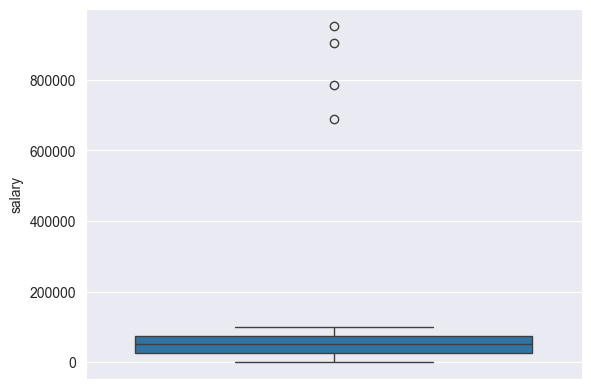

In [11]:
# Analicemos la característica salary
sns.boxplot(data['salary'])

In [12]:
# Efectivamente, tenemos varios valores muy por fuera de la distribución de nuestro dataset
# y pueden ser considerados como outliers, por lo cual serán eliminados de nuestro dataset en conjunto con cualquier valor negativo
data = data[data['salary']>0]
data = data[data['salary']<100000.00]
data.shape

(4004, 8)

## Errores tipográficos

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4004 entries, 0 to 4050
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4004 non-null   object 
 1   job_title           4004 non-null   object 
 2   salary              4004 non-null   float64
 3   employee_residence  4004 non-null   object 
 4   experience_level    4004 non-null   object 
 5   employment_type     4004 non-null   object 
 6   work_setting        4004 non-null   object 
 7   company_size        4004 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.5+ KB


In [14]:
# Veamos los subniveles de nuestras características categóricas
categorical_features = []
for col in data.columns.tolist():
    if data[col].dtype == 'object':
        categorical_features.append(col)
for col in categorical_features:
    print(f'Column: {col}')
    print(f'Unique values: {data[col].unique().tolist()}')

Column: gender
Unique values: ['Male', 'Female', 'Non-binary', 'Polygender', 'Agender', 'Bigender', 'Genderqueer', 'Genderfluid', 'Not-specified']
Column: job_title
Unique values: ['Software Development', 'DEV', 'Business Analyst', 'PM', 'IT Support', 'Database Admin', 'BA', 'Data Engineering', 'Data Science', 'Not-specified']
Column: employee_residence
Unique values: ['Colombia', 'Mexico', 'Ecuador', 'Venezuela', 'Chile']
Column: experience_level
Unique values: ['Executive', 'Mid-level', 'Entry-level', 'Senior-level']
Column: employment_type
Unique values: ['Contract', 'Part-time', 'Full-time']
Column: work_setting
Unique values: ['Remote', 'Office', 'On-site', 'Hybrid']
Column: company_size
Unique values: ['Medium (51-500 employees)', 'Large (501+ employees)', 'Small (1-50 employees)']


### Análisis
- La característica job_title tiene trabajos que son iguales solo que referenciados por sus siglas, estandarizaremos a dejar el nombre completo
- La característica work_setting On-site es igual a Office

Realizaremos los siguientes ajustes
- **job_title**:
    - 'DEV' -> 'Software Development'
    - 'BA' -> 'Business Analyst'
    - 'PM' -> 'Project Manager'
- **work_setting**:
    - 'On-site' -> 'Office'

In [15]:
# Ajustemos la característica job_title
data['job_title'] = data['job_title'].str.replace('DEV','Software Development',regex=False)
data['job_title'] = data['job_title'].str.replace('BA','Business Analyst',regex=False)
data['job_title'] = data['job_title'].str.replace('PM','Project Manager',regex=False)
# Ajustemos la característica work_setting
data['work_setting'] = data['work_setting'].str.replace('On-site','Office',regex=False)
# Revisamos nuevamente los niveles de cada característica
for col in categorical_features:
    print(f'Column: {col}')
    print(f'Unique values: {data[col].unique().tolist()}')

Column: gender
Unique values: ['Male', 'Female', 'Non-binary', 'Polygender', 'Agender', 'Bigender', 'Genderqueer', 'Genderfluid', 'Not-specified']
Column: job_title
Unique values: ['Software Development', 'Business Analyst', 'Project Manager', 'IT Support', 'Database Admin', 'Data Engineering', 'Data Science', 'Not-specified']
Column: employee_residence
Unique values: ['Colombia', 'Mexico', 'Ecuador', 'Venezuela', 'Chile']
Column: experience_level
Unique values: ['Executive', 'Mid-level', 'Entry-level', 'Senior-level']
Column: employment_type
Unique values: ['Contract', 'Part-time', 'Full-time']
Column: work_setting
Unique values: ['Remote', 'Office', 'Hybrid']
Column: company_size
Unique values: ['Medium (51-500 employees)', 'Large (501+ employees)', 'Small (1-50 employees)']


# Exportación del dataset trabajado
Exportamos finalmente nuestro dataset ya procesado para que este pueda ser tomado en un próximo paso

In [16]:
data.to_csv("./data/jobs_salary_example_clean.csv")